# Exploratory Data Analysis of AG news Classification Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with open("00.Data/readme.txt") as f:
    read_me = f.read()
read_me

'AG\'s News Topic Classification Dataset\n\nVersion 3, Updated 09/09/2015\n\n\nORIGIN\n\nAG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity. For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .\n\nThe AG\'s news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. 

In [5]:
with open("00.Data/classes.txt") as f:
    labels = f.read()
    labels = labels.split(sep='\n')
    labels.pop(-1)
labels

['World', 'Sports', 'Business', 'Sci/Tech']

In [6]:
train_df = pd.read_csv("00.Data/train.csv", names=['Category', 'Headline', 'Short Description'])
train_df.head()

,Category,Headline,Short Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [7]:
classes_present = train_df['Category'].value_counts()
classes_present

4    30000
3    30000
2    30000
1    30000
Name: Category, dtype: int64

In [8]:
print("Dataset Size: ", len(train_df))
print("Number of Classes: ", len(classes_present))

Dataset Size:  120000
Number of Classes:  4


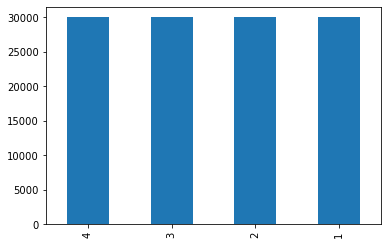

In [9]:
classes_present.plot(kind='bar')

> **Inference**: The datasets seams to be nicely balanced with **30000** samples for each of **4** classes/labels.

**Manual Inspection**

In [10]:
train_df.iloc[0][2]

"Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [11]:
train_df.iloc[12][2]

' JAKARTA (Reuters) - Non-OPEC oil exporters should consider  increasing output to cool record crude prices, OPEC President  Purnomo Yusgiantoro said on Sunday.'

In [12]:
train_df.iloc[23333][2]

'Local commuters waited an average of 45 hours in traffic in 2002, making Charlotte the 19th-most congested city in the nation, according to a study by the Texas Transportation Institute.'

In [18]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
stop_words = stopwords.words('english')

def clean_corpus(corpus, tocase='lower', remove_punc=True, punctuations=list(string.punctuation), remove_whitespace =True,
                 stopwords=stop_words, remove_numbers=True, remove_urls=True, lemmatize=False):
    """
    Takes the corpus as input and performs the corpus cleaning as required,
    then returns the detokenized corpus.
    """
    cleaned_corpus = corpus
    # Tokenize
    tokens = word_tokenize(corpus)
    
    #Convert Multi Lingual Text
    # will be done later
    
    # Convert the corpus to one case (lower or Upper)
    valid_tokens = [token.lower() for token in tokens]
    
    # Remove Punctuations
    if remove_punc:
        valid_tokens = [token for token in valid_tokens if token not in punctuations]
    
    # Remove White Space
        # will be done later
        
    # Remove Other Special Characters.
    if remove_numbers:
        valid_tokens = [token for token in valid_tokens if re.search('[0-9]+', token) is None]
    
    # Remove urls.
    if remove_urls:
        valid_tokens = [token for token in valid_tokens if re.search('https+|http+', token) is None]
    
    # Remove stop words
    valid_tokens = [token for token in valid_tokens if token not in stop_words]
    
    #lemmatization / stemming
    if lemmatize:
        word_lem = WordNetLemmatizer()
        valid_tokens = [word_lem.lemmatize(token) for token in valid_tokens]
    else:
        pst = PorterStemmer()
        valid_tokens = [pst.stem(token) for token in valid_tokens]
    
    # De-tokenize
    cleaned_corpus = "".join([" "+i if not i.startswith("'") and i not in '!%\'()*+,-./:;<=>?@[\\]^_`{|}~'
                              else i for i in valid_tokens]).strip()
    return cleaned_corpus
    

In [19]:
train_df['norm_Headline'] = train_df['Headline'].apply(clean_corpus)
train_df['norm_Description'] = train_df['Short Description'].apply(clean_corpus)
train_df[]

,Category,Headline,Short Description,norm_Headline
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bear claw back black reuter
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyl look toward commerci aerospac reuter
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil economi cloud stock outlook reuter
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halt oil export main southern pipelin reuter
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil price soar all-tim record pose new menac u...
...,...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...,pakistan's musharraf say wo n't quit armi chief
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...,renteria sign top-shelf deal
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...,saban go dolphin yet
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...,today's nfl game
